In [22]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas
#!pip list

In [23]:
#!pip install openpyxl

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
df = pd.read_excel("вар10.xlsx", engine='openpyxl')

In [26]:
df.head()

,Успех,"Торговельна площа, кв. м.",Этаж,Количество касс,Тип,Рейтинг в гуглі,Количество чеков,Средний чек,Населення,Середній дохід населення,Зупинка ГТ додому,Пішохідний перехід,Спеціалізований хліб,Спеціалізоване м'ясо,Спеціалізований сир
0,не успішний,9.0,1,1,Соціальний,3.0,659.0,76.85,108.0,14910.0,0,0,0,0,0
1,не успішний,22.0,1,1,Соціальний,4.1,1518.0,84.86,750.0,9030.0,0,0,0,0,0
2,не успішний,13.0,1,1,Соціальний,3.0,476.0,112.02,0.0,9030.0,0,0,0,0,0
3,не успішний,18.0,1,1,Стандартний,3.0,1310.0,119.80,0.0,13930.0,0,0,0,0,0
4,не успішний,25.0,1,1,Соціальний,4.0,2029.0,94.88,0.0,14560.0,0,0,0,0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Успех                      69 non-null     object 
 1   Торговельна площа, кв. м.  69 non-null     float64
 2   Этаж                       69 non-null     int64  
 3   Количество касс            69 non-null     int64  
 4   Тип                        69 non-null     object 
 5   Рейтинг в гуглі            69 non-null     float64
 6   Количество чеков           62 non-null     float64
 7   Средний чек                62 non-null     float64
 8   Населення                  64 non-null     float64
 9   Середній дохід населення   64 non-null     float64
 10  Зупинка ГТ додому          69 non-null     int64  
 11  Пішохідний перехід         69 non-null     int64  
 12  Спеціалізований хліб       69 non-null     int64  
 13  Спеціалізоване м'ясо       69 non-null     int64  
 

# Null values

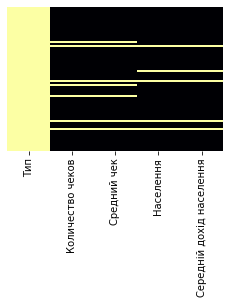

In [42]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 0.5, 0.5])
missings = pd.DataFrame(df.isnull().sum())
vars_with_missings = missings[missings > 1].dropna().index.tolist()
sns.heatmap(df[vars_with_missings].isnull(),
            cbar=False, yticklabels=False, cmap='inferno', ax=ax)
plt.show()

Заполним недостающие значения

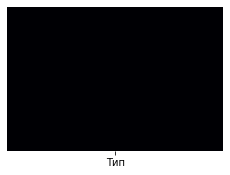

In [43]:
df['Количество чеков'] = df['Количество чеков'].fillna(df['Количество чеков'].mean())
df['Средний чек'] = df['Средний чек'].fillna(df['Средний чек'].mean())
df['Населення'] = df['Населення'].fillna(df['Населення'].mean())
df['Середній дохід населення'] = df['Середній дохід населення'].fillna(df['Середній дохід населення'].mean())
fig = plt.figure()
ax = fig.add_axes([0, 0, 0.5, 0.5])
missings = pd.DataFrame(df.isnull().sum())
vars_with_missings = missings[missings > 1].dropna().index.tolist()
sns.heatmap(df[vars_with_missings].isnull(),
            cbar=False, yticklabels=False, cmap='inferno', ax=ax)
plt.show()

# Encoding

In [54]:
df.Тип.value_counts()

Преміальний        29
Стандартний        19
Соціальний         18
Соціальний Плюс     2
Стандарт Плюс       1
Name: Тип, dtype: int64

In [55]:
type = {'Стандарт Плюс':0,'Соціальний Плюс':1, 'Соціальний':2, 'Стандартний':3, 'Преміальний':4}
df['Тип'] = df['Тип'].map(type)

In [56]:
df

,Успех,"Торговельна площа, кв. м.",Этаж,Количество касс,Тип,Рейтинг в гуглі,Количество чеков,Средний чек,Населення,Середній дохід населення,Зупинка ГТ додому,Пішохідний перехід,Спеціалізований хліб,Спеціалізоване м'ясо,Спеціалізований сир
0,не успішний,9.00,1,1,2,3.0,659.0,76.85,108.0,14910.0,0,0,0,0,0
1,не успішний,22.00,1,1,2,4.1,1518.0,84.86,750.0,9030.0,0,0,0,0,0
2,не успішний,13.00,1,1,2,3.0,476.0,112.02,0.0,9030.0,0,0,0,0,0
3,не успішний,18.00,1,1,3,3.0,1310.0,119.80,0.0,13930.0,0,0,0,0,0
4,не успішний,25.00,1,1,2,4.0,2029.0,94.88,0.0,14560.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,40.78,1,2,4,4.0,6884.0,107.37,963.0,9800.0,1,0,0,1,1
65,успішний,21.50,1,1,4,2.3,4721.0,89.13,0.0,12600.0,0,0,0,0,0
66,не успішний,115.23,1,1,3,3.0,3286.0,105.62,315.0,10570.0,0,0,0,0,0
67,не успішний,34.80,1,2,2,4.3,3963.0,168.07,0.0,12460.0,0,0,0,0,0


In [57]:
df.Успех.value_counts()

не успішний    44
успішний       25
Name: Успех, dtype: int64

In [58]:
type_ = {'не успішний':0,'успішний':1}
df['Успех'] = df['Успех'].map(type_)
df

,Успех,"Торговельна площа, кв. м.",Этаж,Количество касс,Тип,Рейтинг в гуглі,Количество чеков,Средний чек,Населення,Середній дохід населення,Зупинка ГТ додому,Пішохідний перехід,Спеціалізований хліб,Спеціалізоване м'ясо,Спеціалізований сир
0,0,9.00,1,1,2,3.0,659.0,76.85,108.0,14910.0,0,0,0,0,0
1,0,22.00,1,1,2,4.1,1518.0,84.86,750.0,9030.0,0,0,0,0,0
2,0,13.00,1,1,2,3.0,476.0,112.02,0.0,9030.0,0,0,0,0,0
3,0,18.00,1,1,3,3.0,1310.0,119.80,0.0,13930.0,0,0,0,0,0
4,0,25.00,1,1,2,4.0,2029.0,94.88,0.0,14560.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,40.78,1,2,4,4.0,6884.0,107.37,963.0,9800.0,1,0,0,1,1
65,1,21.50,1,1,4,2.3,4721.0,89.13,0.0,12600.0,0,0,0,0,0
66,0,115.23,1,1,3,3.0,3286.0,105.62,315.0,10570.0,0,0,0,0,0
67,0,34.80,1,2,2,4.3,3963.0,168.07,0.0,12460.0,0,0,0,0,0


In [59]:
df.Этаж.value_counts()

1    69
Name: Этаж, dtype: int64

# Chouse features

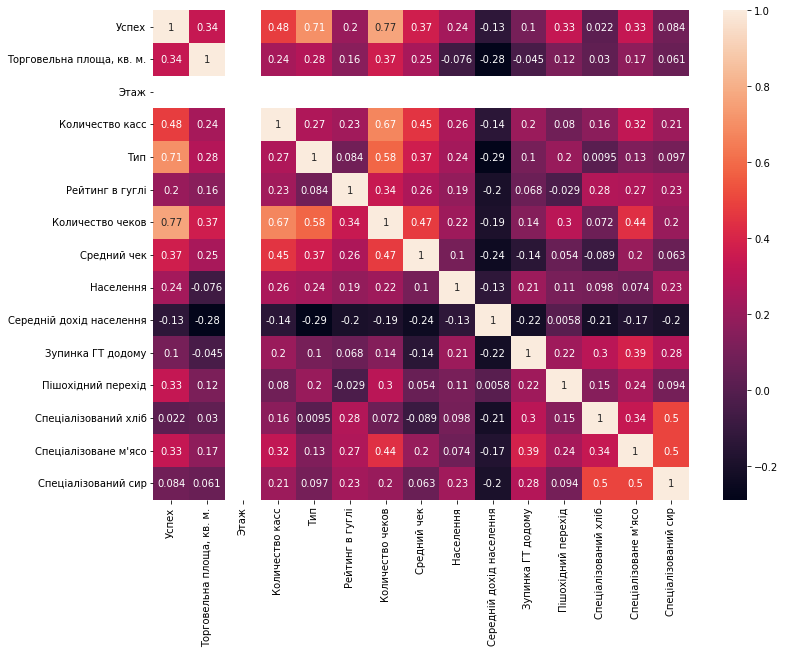

In [60]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

# Classification Tree & Ensembles

In [86]:
#!pip install sklearn

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [93]:
features = ['Количество чеков', 'Количество касс']
X =df[features]
y = df['Успех']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [94]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

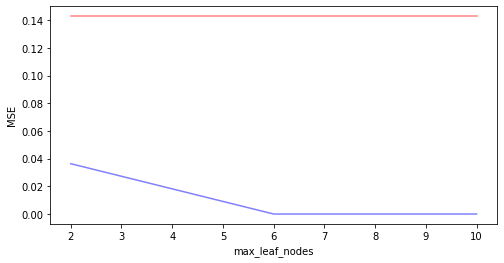

In [95]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

# Model

In [96]:
# Fitting Classification Tree to the Training set (2 variables)
ct = DecisionTreeClassifier(max_leaf_nodes = 3, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

# Result

In [97]:
# Predicting the Test set results
y_pred = ct.predict(X_test)
ct.score(X_test,y_test)

0.8571428571428571

Можем сделать вывод что в 85% модель соверашет правильных поступков

In [98]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9 2]
 [0 3]]


Как видно, 11 примеров распознано верно, 2 не верно

In [99]:
df.drop(columns=['Успех']).columns

Index(['Торговельна площа, кв. м.', 'Этаж', 'Количество касс', 'Тип',
       'Рейтинг в гуглі', 'Количество чеков', 'Средний чек', 'Населення',
       'Середній дохід населення', 'Зупинка ГТ додому', 'Пішохідний перехід',
       'Спеціалізований хліб', 'Спеціалізоване м'ясо', 'Спеціалізований сир'],
      dtype='object')

Text(0.5, 1.0, 'Boosting. Feature Importance')

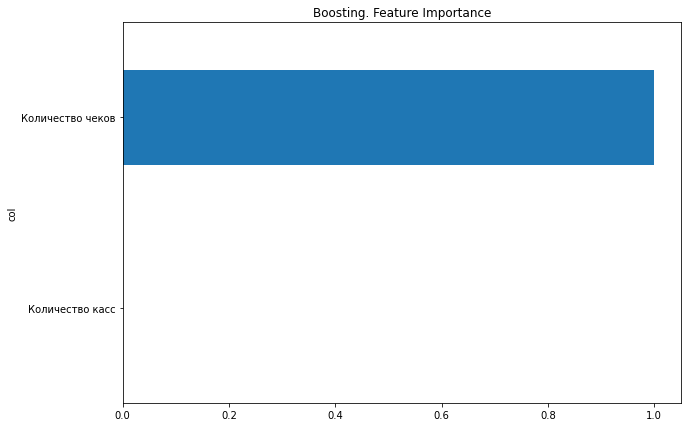

In [100]:
# Features importances
col = features
ct_imp = pd.DataFrame({'imp': ct.feature_importances_, 'col': col})
ct_imp = ct_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
ct_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Boosting. Feature Importance')

# Visualisation

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set['Количество чеков'].min() - 1, stop = X_set['Количество чеков'].max() + 1),
                     np.arange(start = X_set['Количество касс'].min() - 1, stop = X_set['Количество касс'].max() + 1))
plt.contourf(X1, X2, ct.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set['Количество чеков'][y_set == j], X_set['Количество касс'][y_set == j],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classification Tree (Test set)')
plt.xlabel('Количество чеков')
plt.ylabel('Количество касс')
plt.legend()
plt.show()

# Forest

# Paremeters

In [104]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

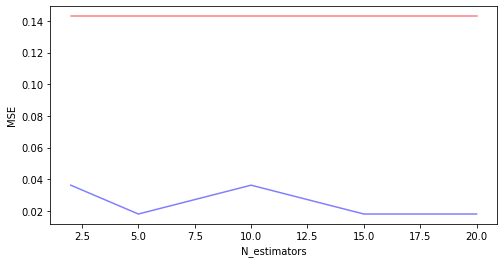

In [105]:
# The optimal number of trees 
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])

In [106]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=5, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

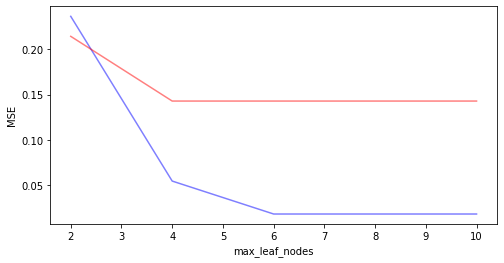

In [107]:
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

# Model

In [109]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 4, max_leaf_nodes = 6, random_state = 10).fit(X_train, y_train)

# Results

In [110]:
# Predicting the Test set results
y_pred = rf.predict(X_test)
y_pred = (y_pred > 0.5)
rf.score(X_test,y_test).round(3)

0.857


Можем сделать вывод что в 86% модель совершет правильных поступков

In [111]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9 2]
 [0 3]]



Видим что 12 примеров распознано верно, 2 не верно

Text(0.5, 1.0, 'Boosting. Feature Importance')

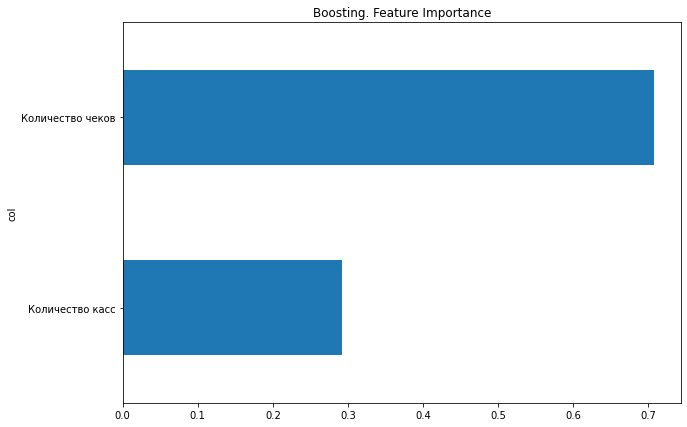

In [112]:
# Features importances
rf_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': col})
rf_imp = rf_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
rf_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Boosting. Feature Importance')

# Visualisation

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


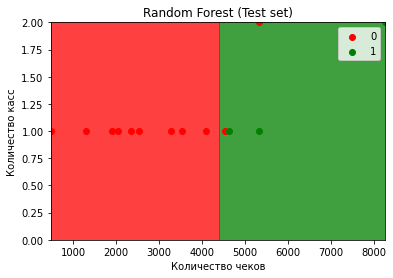

In [121]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set['Количество чеков'].min() - 1, stop = X_set['Количество чеков'].max() + 1),
                     np.arange(start = X_set['Количество касс'].min() - 1, stop = X_set['Количество касс'].max() + 1))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set['Количество чеков'][y_set == j], X_set['Количество касс'][y_set == j],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Количество чеков')
plt.ylabel('Количество касс')
plt.legend()
plt.show()

# CatBoost

Paremeters

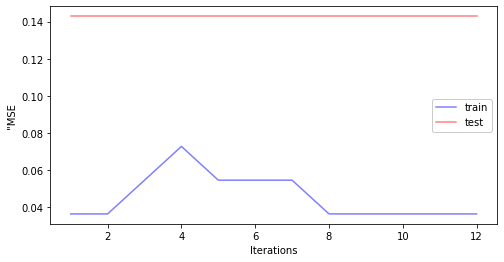

In [114]:
def catboost_best_iterations(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=i,random_state=10).fit(X_train, y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel('"MSE')
    ax.set_xlabel('Iterations')
    ax.legend(framealpha=1, frameon=True);
    
from catboost import CatBoostClassifier
catboost_best_iterations(X_train, X_test, y_train, y_test, list(range(1,13)))

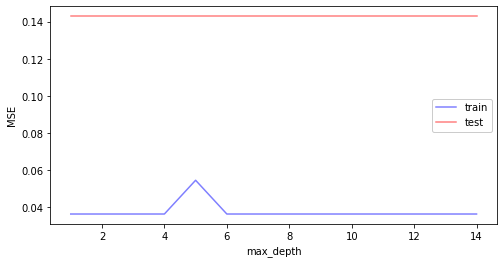

In [115]:
def catboost_max_depth(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=12,max_depth=i,random_state=10).fit(X_train,y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_depth")
    ax.legend(framealpha=1, frameon=True);

catboost_max_depth(X_train, X_test, y_train, y_test, list(range(1,15)))

# Model

In [116]:
# Fitting CatBoost to the Training set
cb = CatBoostClassifier(iterations=12,max_depth=6,random_state=10).fit(X_train, y_train,eval_set=(X_test, y_test),logging_level='Silent')

# Results

In [117]:
# Predicting the Test set results
cb_y_pred = cb.predict(X_test)
cb.score(X_test,y_test).round(3)

0.857

Можем сделать вывод что в 86% модель соверашет правильных поступков

In [118]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, cb_y_pred)
print(cm)

[[9 2]
 [0 3]]


Как видно, все 12 примеров распознано верно, 2 с ошибкой

Text(0.5, 1.0, 'Boosting. Feature Importance')

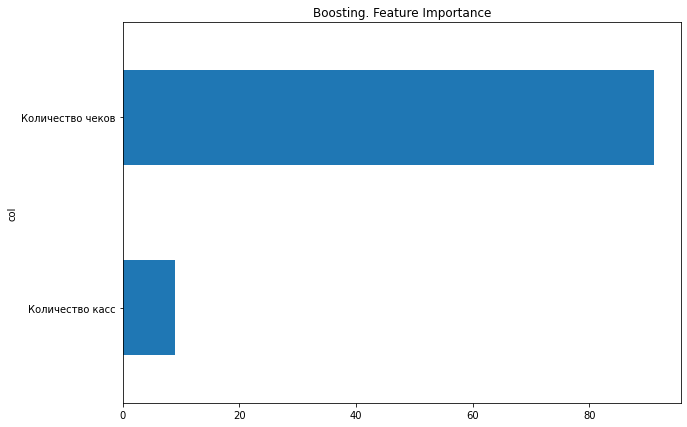

In [119]:
# Features importances
cb_imp = pd.DataFrame({'imp': cb.get_feature_importance(), 'col': col})
cb_imp = cb_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
cb_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Boosting. Feature Importance')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


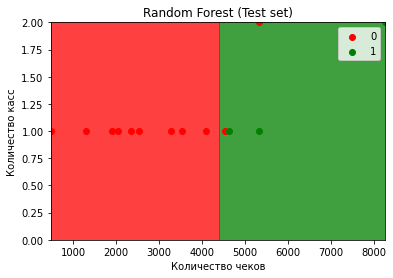

In [121]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set['Количество чеков'].min() - 1, stop = X_set['Количество чеков'].max() + 1),
                     np.arange(start = X_set['Количество касс'].min() - 1, stop = X_set['Количество касс'].max() + 1))
plt.contourf(X1, X2, cb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set['Количество чеков'][y_set == j], X_set['Количество касс'][y_set == j],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Количество чеков')
plt.ylabel('Количество касс')
plt.legend()
plt.show()

# Hierarchical Clustering

In [122]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df_arr = sc.transform(df)

In [123]:
df

,Успех,"Торговельна площа, кв. м.",Этаж,Количество касс,Тип,Рейтинг в гуглі,Количество чеков,Средний чек,Населення,Середній дохід населення,Зупинка ГТ додому,Пішохідний перехід,Спеціалізований хліб,Спеціалізоване м'ясо,Спеціалізований сир
0,0,9.00,1,1,2,3.0,659.0,76.85,108.0,14910.0,0,0,0,0,0
1,0,22.00,1,1,2,4.1,1518.0,84.86,750.0,9030.0,0,0,0,0,0
2,0,13.00,1,1,2,3.0,476.0,112.02,0.0,9030.0,0,0,0,0,0
3,0,18.00,1,1,3,3.0,1310.0,119.80,0.0,13930.0,0,0,0,0,0
4,0,25.00,1,1,2,4.0,2029.0,94.88,0.0,14560.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,40.78,1,2,4,4.0,6884.0,107.37,963.0,9800.0,1,0,0,1,1
65,1,21.50,1,1,4,2.3,4721.0,89.13,0.0,12600.0,0,0,0,0,0
66,0,115.23,1,1,3,3.0,3286.0,105.62,315.0,10570.0,0,0,0,0,0
67,0,34.80,1,2,2,4.3,3963.0,168.07,0.0,12460.0,0,0,0,0,0


In [124]:
df = pd.DataFrame(df_arr, columns=df.columns).round()

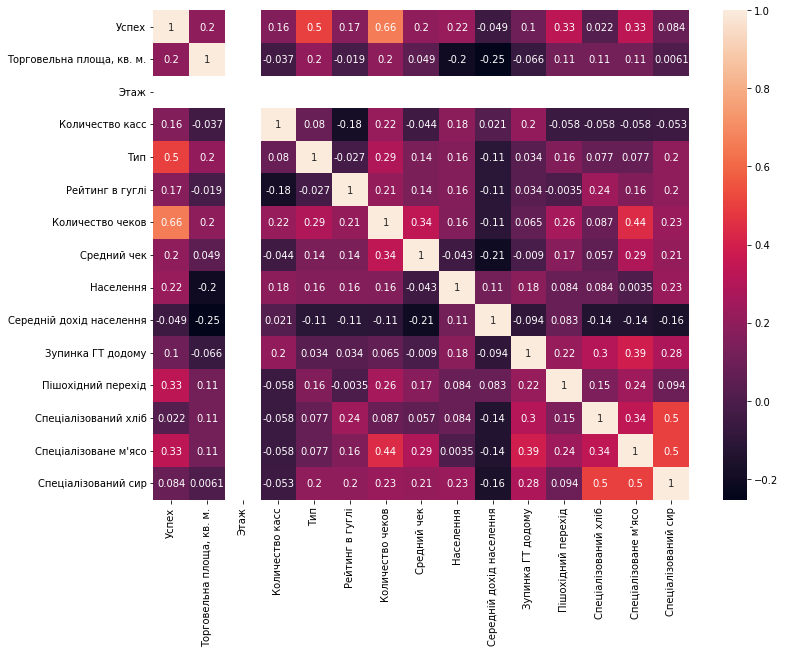

In [125]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

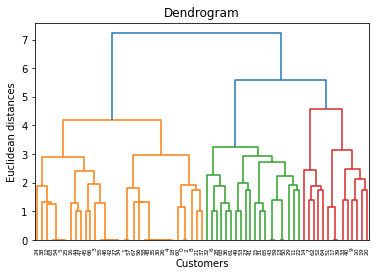

In [126]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [127]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [128]:
hc

array([0, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 2, 0, 2, 3, 2, 0, 1, 0, 1, 1, 0,
       2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 1, 3, 2, 0, 0, 0, 0, 0, 2, 0, 2, 3, 0, 3, 2,
       0, 0, 2], dtype=int64)

# Feature Reduction

In [129]:
X = df.iloc[:, [0, 5, 6]]

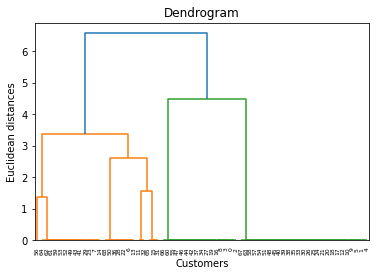

In [130]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Исходя из графика можно сказть что подходящее количество классов это 2

In [131]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [132]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('clust.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

# K-Means Clustering

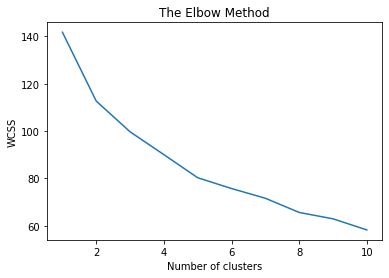

In [133]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

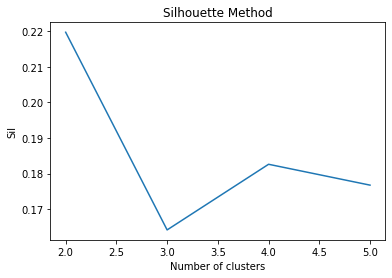

2:0.21977073548310314
3:0.16414148683240753
4:0.18261361365380396
5:0.17674290136636345


In [134]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

# Model

In [135]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 3, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = df.columns).round(2)

,Успех,"Торговельна площа, кв. м.",Этаж,Количество касс,Тип,Рейтинг в гуглі,Количество чеков,Средний чек,Населення,Середній дохід населення,Зупинка ГТ додому,Пішохідний перехід,Спеціалізований хліб,Спеціалізоване м'ясо,Спеціалізований сир
0,0.83,0.17,0.0,0.00,1.00,1.00,0.83,0.50,0.50,0.83,0.83,0.50,0.67,1.00,1.00
1,-0.00,0.05,0.0,0.00,0.51,0.63,0.02,0.07,0.23,0.98,0.21,0.07,0.16,0.07,0.12
2,1.00,0.15,0.0,0.05,1.00,0.75,0.50,0.10,0.40,1.00,0.20,0.35,0.10,0.20,0.00


# Feature Reduction

In [136]:
X = df.iloc[:, [0, 5, 6]]

In [150]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Успех','Количество чеков','Количество касс']).round()

,Успех,Количество чеков,Количество касс
0,1.0,1.0,1.0
1,-0.0,1.0,0.0


# Results matching

In [151]:
# Importing hc clusters
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

In [152]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

0.4973577637297511

In [153]:
# Export km clusters
import pickle
obj = {'km': km}
output = open('clust-km1.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()